In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
import scipy.stats
from matplotlib.dates import DateFormatter, date2num

In [68]:
file_path = r'D:\Stations_data\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [69]:
df1 = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [70]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [71]:
df3 = pd.read_csv('Temp_Rain_Bansathi.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [72]:
# date_mask = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-15')

In [73]:
# date_mask.shape

In [74]:
date_mask1 = (df1_1hr.index >= '2020-04-11') & (df1_1hr.index < '2020-04-17')
date_mask2 = (df2_1hr.index >= '2020-04-11') & (df2_1hr.index < '2020-04-17')
date_mask3 = (df3_1hr.index >= '2020-04-11') & (df3_1hr.index < '2020-04-17')
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

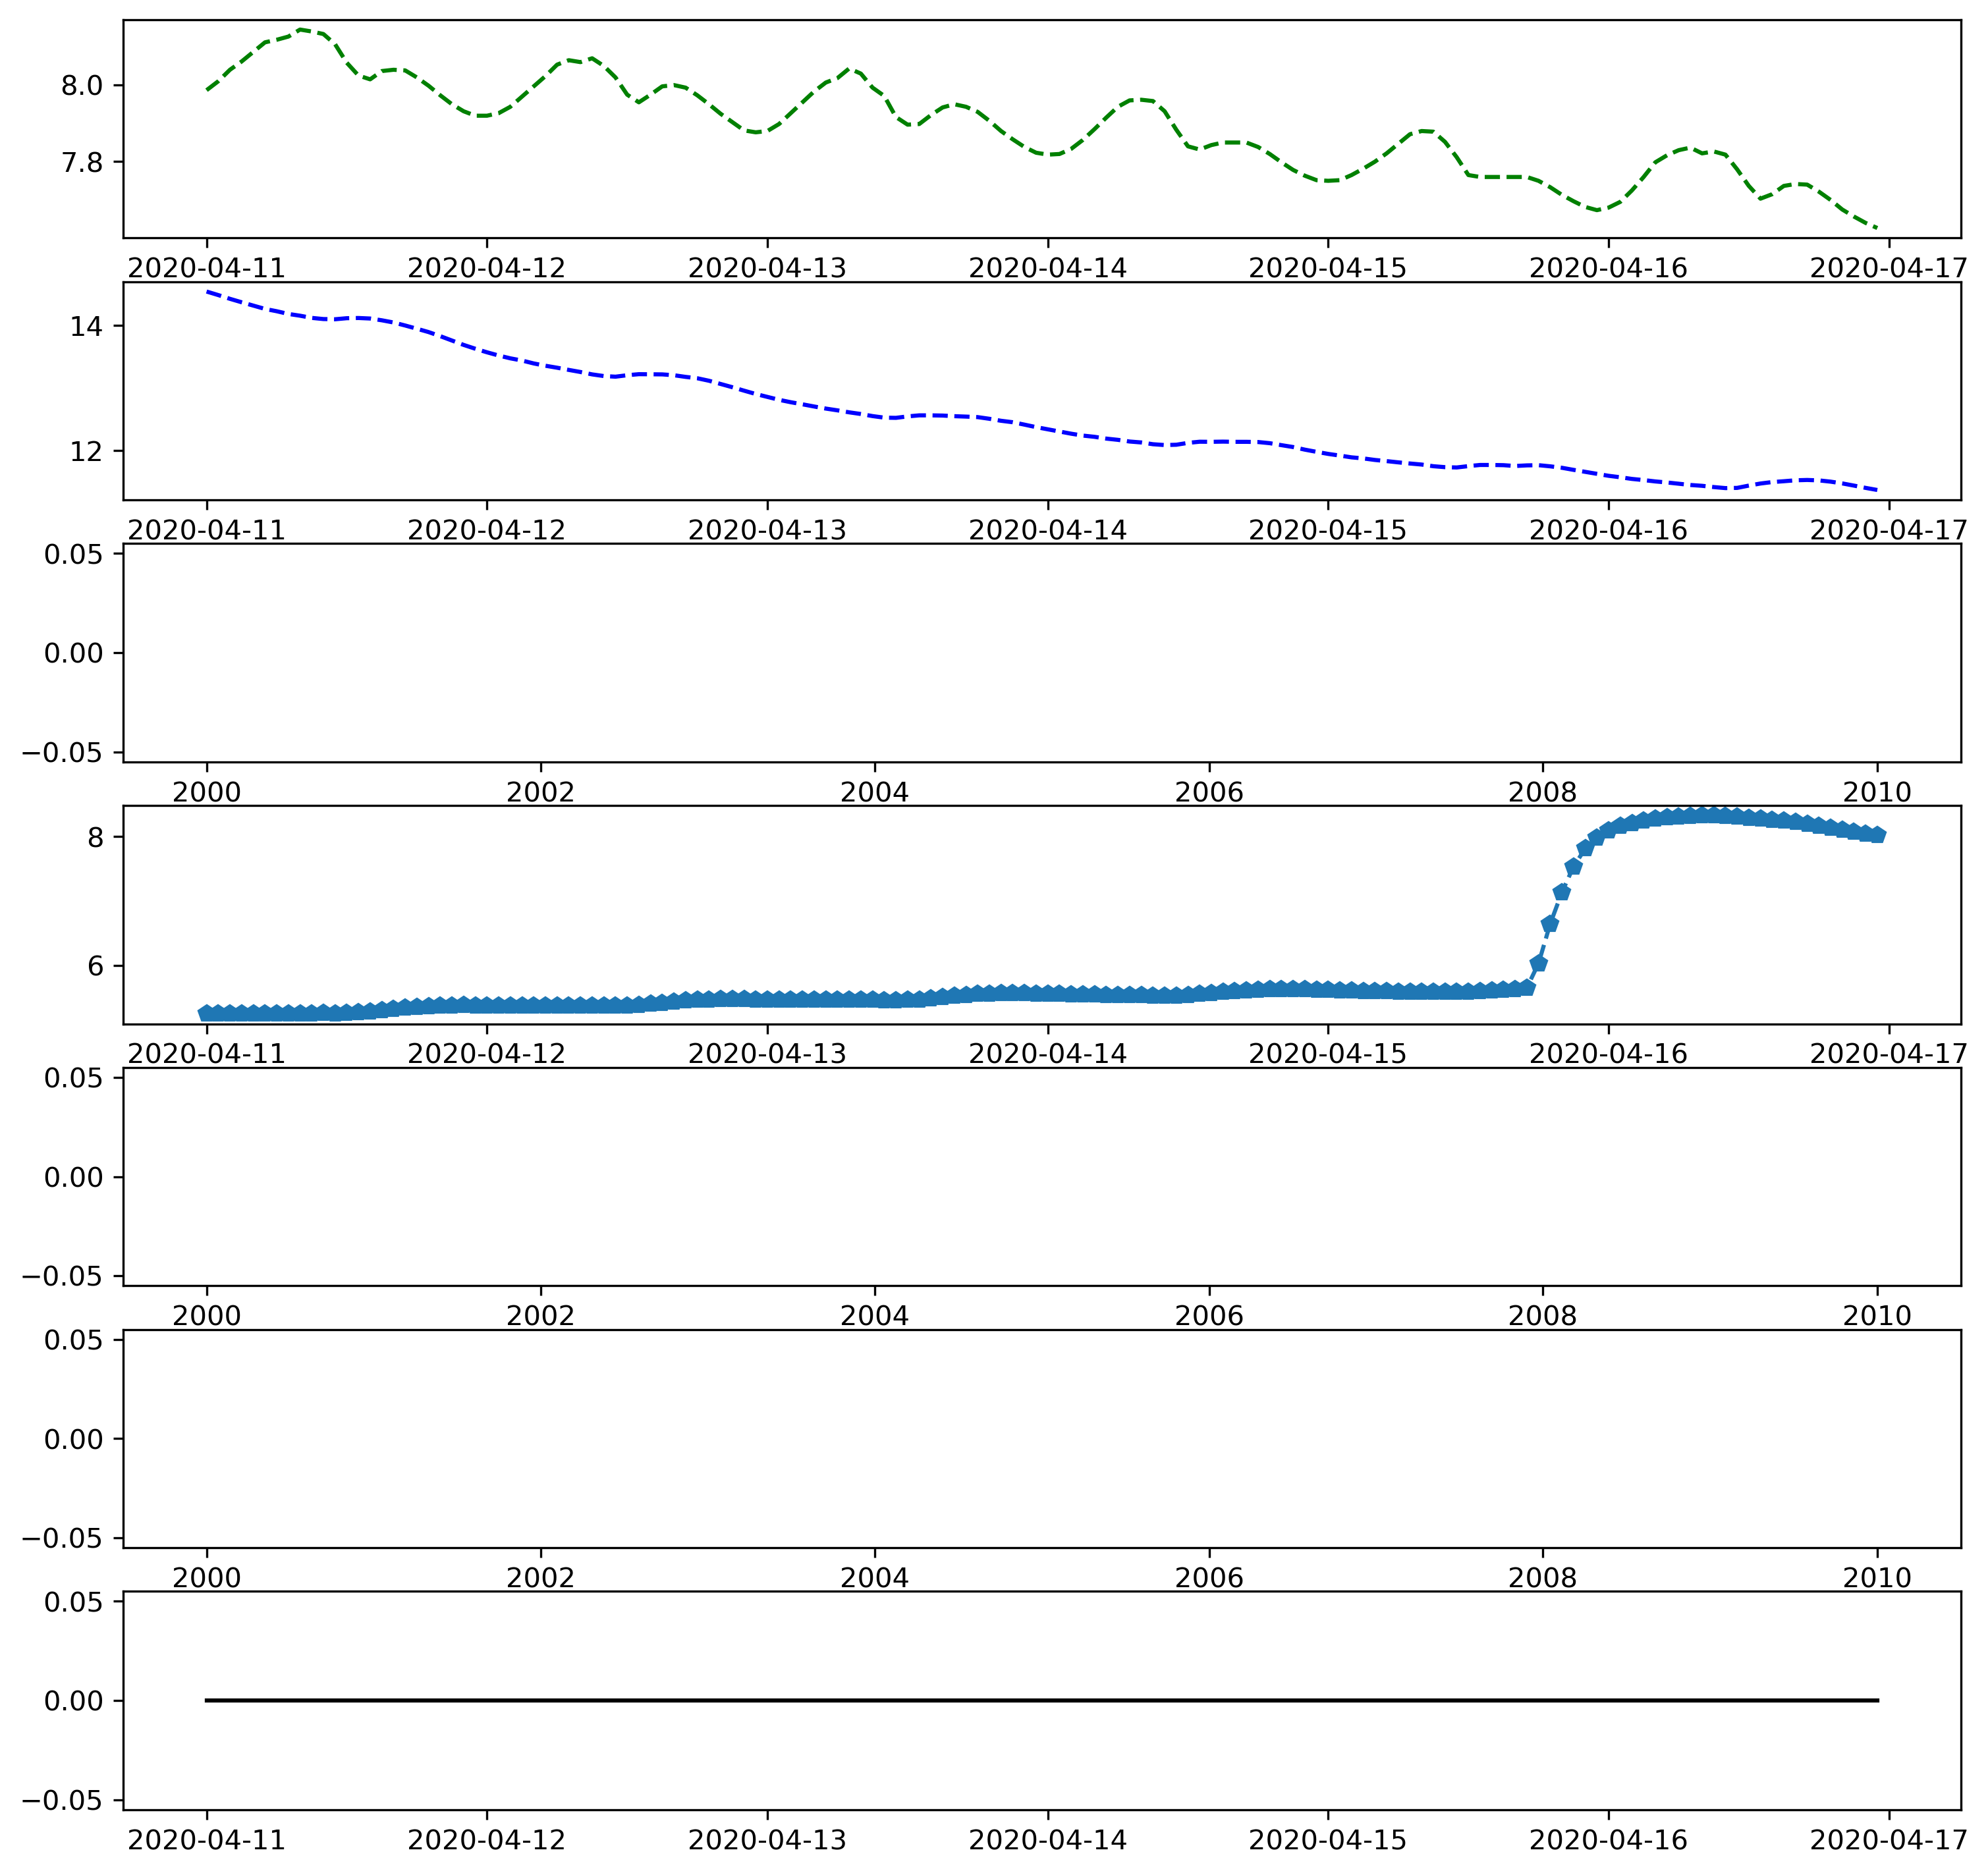

In [75]:
fig, ax = plt.subplots(7, 1, figsize = (12, 12), dpi = 300)
ax[0].plot(SM_sensor1, 'g--', label = 'Sensor-1')
ax[1].plot(SM_sensor5, 'b--', label = 'Sensor-5')
ax[2].plot(SM_sensor6, 'r--', label = 'Sensor-6')
ax[3].plot(SM_sensor7, 'p--', label = 'Sensor-7')
ax[4].plot(SM_sensor8, 'm--', label = 'Sensor-8')
ax[5].plot(SM_sensor9, 'y--', label = 'Sensor-9')
ax[6].plot(Rainfall, 'k', label = 'Rainfall');
# ax[0,1,2,3,4,5,6].legend();

In [76]:
# SM_sensor1 = SM_sensor1.interpolate(method='linear')
# SM_sensor2 = SM_sensor2.values.fillna(method='ffill')
# SM_sensor3 = SM_sensor3.values.fillna(method='ffill')
# SM_sensor4 = SM_sensor4.values.fillna(method='ffill')
# SM_sensor5 = SM_sensor5.values.fillna(method='ffill')

In [77]:
# SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
# SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
# SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
# SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
# SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
# SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
# SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
# SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
# SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
# SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

# ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
# ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
# ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
# ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
# ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
# ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
# ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
# ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
# ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
# ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')

In [78]:
# picking the maximum soil moisture, soil temperature and air temperature values per day

max_S1SM_hour= SM_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2SM_hour= SM_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3SM_hour= SM_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4SM_hour= SM_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5SM_hour= SM_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6SM_hour= SM_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7SM_hour= SM_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8SM_hour= SM_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9SM_hour= SM_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10SM_hour= SM_sensor10.groupby(pd.Grouper(freq='D')).idxmax()

max_S1ST_hour= ST_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2ST_hour= ST_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3ST_hour= ST_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4ST_hour= ST_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5ST_hour= ST_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6ST_hour= ST_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7ST_hour= ST_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8ST_hour= ST_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9ST_hour= ST_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10ST_hour= ST_sensor10.groupby(pd.Grouper(freq='D')).idxmax()
max_AirT_hour= Air_Temp.groupby(pd.Grouper(freq='D')).idxmax()

In [79]:
## Soil Temperature and air temperature lag

# Temperature lags
T_S1_lag = max_S1ST_hour - max_AirT_hour
T_S5_lag = max_S5ST_hour - max_AirT_hour
# T_S6_lag = max_S6ST_hour - max_AirT_hour
T_S7_lag = max_S7ST_hour - max_AirT_hour
# T_S8_lag = max_S8ST_hour - max_AirT_hour
# T_S9_lag = max_S9ST_hour - max_AirT_hour

#Temperature and moisture lags
SMT_S1_lag = max_S1ST_hour - max_S1SM_hour
SMT_S5_lag = max_S5ST_hour - max_S5SM_hour
# SMT_S6_lag = max_S6ST_hour - max_S6SM_hour
SMT_S7_lag = max_S7ST_hour - max_S7SM_hour
# SMT_S8_lag = max_S8ST_hour - max_S8SM_hour
# SMT_S9_lag = max_S9ST_hour - max_S9SM_hour

In [80]:
print('Soil Temperature: Sensor1')
print(max_S1ST_hour)
print('\n')
print('Soil Temperature: Sensor5')
print(max_S5ST_hour)
print('\n')
print('Soil Temperature: Sensor6')
print(max_S6ST_hour)
print('\n')
print('Soil Temperature: Sensor7')
print(max_S7ST_hour)
print('\n')
print('Soil Temperature: Sensor8')
print(max_S8ST_hour)
print('\n')
print('Soil Temperature: Sensor9')
print(max_S9ST_hour)
print('\n')
print('Air Temperature')
print(max_AirT_hour)

Soil Temperature: Sensor1
date
2020-04-11   2020-04-11 17:00:00
2020-04-12   2020-04-12 17:00:00
2020-04-13   2020-04-13 17:00:00
2020-04-14   2020-04-14 17:00:00
2020-04-15   2020-04-15 17:00:00
2020-04-16   2020-04-16 17:00:00
Freq: D, Name: S1Temp, dtype: datetime64[ns]


Soil Temperature: Sensor5
date
2020-04-11   2020-04-11 17:00:00
2020-04-12   2020-04-12 17:00:00
2020-04-13   2020-04-13 18:00:00
2020-04-14   2020-04-14 18:00:00
2020-04-15   2020-04-15 18:00:00
2020-04-16   2020-04-16 17:00:00
Freq: D, Name: S5Temp, dtype: datetime64[ns]


Soil Temperature: Sensor6
date
2020-04-11   NaN
2020-04-12   NaN
2020-04-13   NaN
2020-04-14   NaN
2020-04-15   NaN
2020-04-16   NaN
Freq: D, Name: S6Temp, dtype: float64


Soil Temperature: Sensor7
date
2020-04-11   2020-04-11 20:00:00
2020-04-12   2020-04-12 20:00:00
2020-04-13   2020-04-13 20:00:00
2020-04-14   2020-04-14 20:00:00
2020-04-15   2020-04-15 19:00:00
2020-04-16   2020-04-16 19:00:00
Freq: D, Name: S7Temp, dtype: datetime64[ns]



In [81]:
print("#####Soil - Air Temperature lag#####")
# print('Sensor1 Lag:', '\n', T_S1_lag.describe())
# print('Sensor5 Lag:', '\n', T_S5_lag.describe())
# print('Sensor6 Lag:', '\n', T_S6_lag.describe())
# print('Sensor7 Lag:', '\n', T_S7_lag.describe())
# print('Sensor8 Lag:', '\n', T_S8_lag.describe())
# print('Sensor9 Lag:', '\n', T_S9_lag.describe())

#####Soil - Air Temperature lag#####


In [82]:
print('Sensor1 Max Soil Moisture:', '\n', max_S1SM_hour)
print('Sensor5 Max Soil Moisture:', '\n', max_S5SM_hour)
print('Sensor6 Max Soil Moisture:', '\n', max_S6SM_hour)
print('Sensor7 Max Soil Moisture:', '\n', max_S7SM_hour)
print('Sensor8 Max Soil Moisture:', '\n', max_S8SM_hour)
print('Sensor9 Max Soil Moisture:', '\n', max_S9SM_hour)

Sensor1 Max Soil Moisture: 
 date
2020-04-11   2020-04-11 08:00:00
2020-04-12   2020-04-12 09:00:00
2020-04-13   2020-04-13 07:00:00
2020-04-14   2020-04-14 08:00:00
2020-04-15   2020-04-15 08:00:00
2020-04-16   2020-04-16 07:00:00
Freq: D, Name: S1SM, dtype: datetime64[ns]
Sensor5 Max Soil Moisture: 
 date
2020-04-11   2020-04-11
2020-04-12   2020-04-12
2020-04-13   2020-04-13
2020-04-14   2020-04-14
2020-04-15   2020-04-15
2020-04-16   2020-04-16
Freq: D, Name: S5SM, dtype: datetime64[ns]
Sensor6 Max Soil Moisture: 
 date
2020-04-11   NaN
2020-04-12   NaN
2020-04-13   NaN
2020-04-14   NaN
2020-04-15   NaN
2020-04-16   NaN
Freq: D, Name: S6SM, dtype: float64
Sensor7 Max Soil Moisture: 
 date
2020-04-11   2020-04-11 22:00:00
2020-04-12   2020-04-12 21:00:00
2020-04-13   2020-04-13 21:00:00
2020-04-14   2020-04-14 20:00:00
2020-04-15   2020-04-15 23:00:00
2020-04-16   2020-04-16 09:00:00
Freq: D, Name: S7SM, dtype: datetime64[ns]
Sensor8 Max Soil Moisture: 
 date
2020-04-11   NaN
2020-0

In [83]:
timelag_df = pd.concat([T_S1_lag, T_S5_lag, SMT_S1_lag, SMT_S5_lag], axis = 1)
# x = pd.to_timedelta(T_S1_lag)
# y = pd.to_datetime(x)
# plt.plot(y, 'r')
# plt.ytick_label[1, 2, 3, 4, 5];
timelag_df.rename(columns = {"0": 'S1_Temp_Lag', "1": 'S5_Temp_Lag', "3":'S1_SMT_Lag',
                             "4":'S5_SMT_Lag'}, inplace = True)
timelag_df

,0,1,2,3
date,,,,
2020-04-11,0 days 02:00:00,0 days 02:00:00,0 days 09:00:00,0 days 17:00:00
2020-04-12,0 days 03:00:00,0 days 03:00:00,0 days 08:00:00,0 days 17:00:00
2020-04-13,0 days 02:00:00,0 days 03:00:00,0 days 10:00:00,0 days 18:00:00
2020-04-14,0 days 03:00:00,0 days 04:00:00,0 days 09:00:00,0 days 18:00:00
2020-04-15,0 days 01:00:00,0 days 02:00:00,0 days 09:00:00,0 days 18:00:00
2020-04-16,0 days 03:00:00,0 days 03:00:00,0 days 10:00:00,0 days 17:00:00


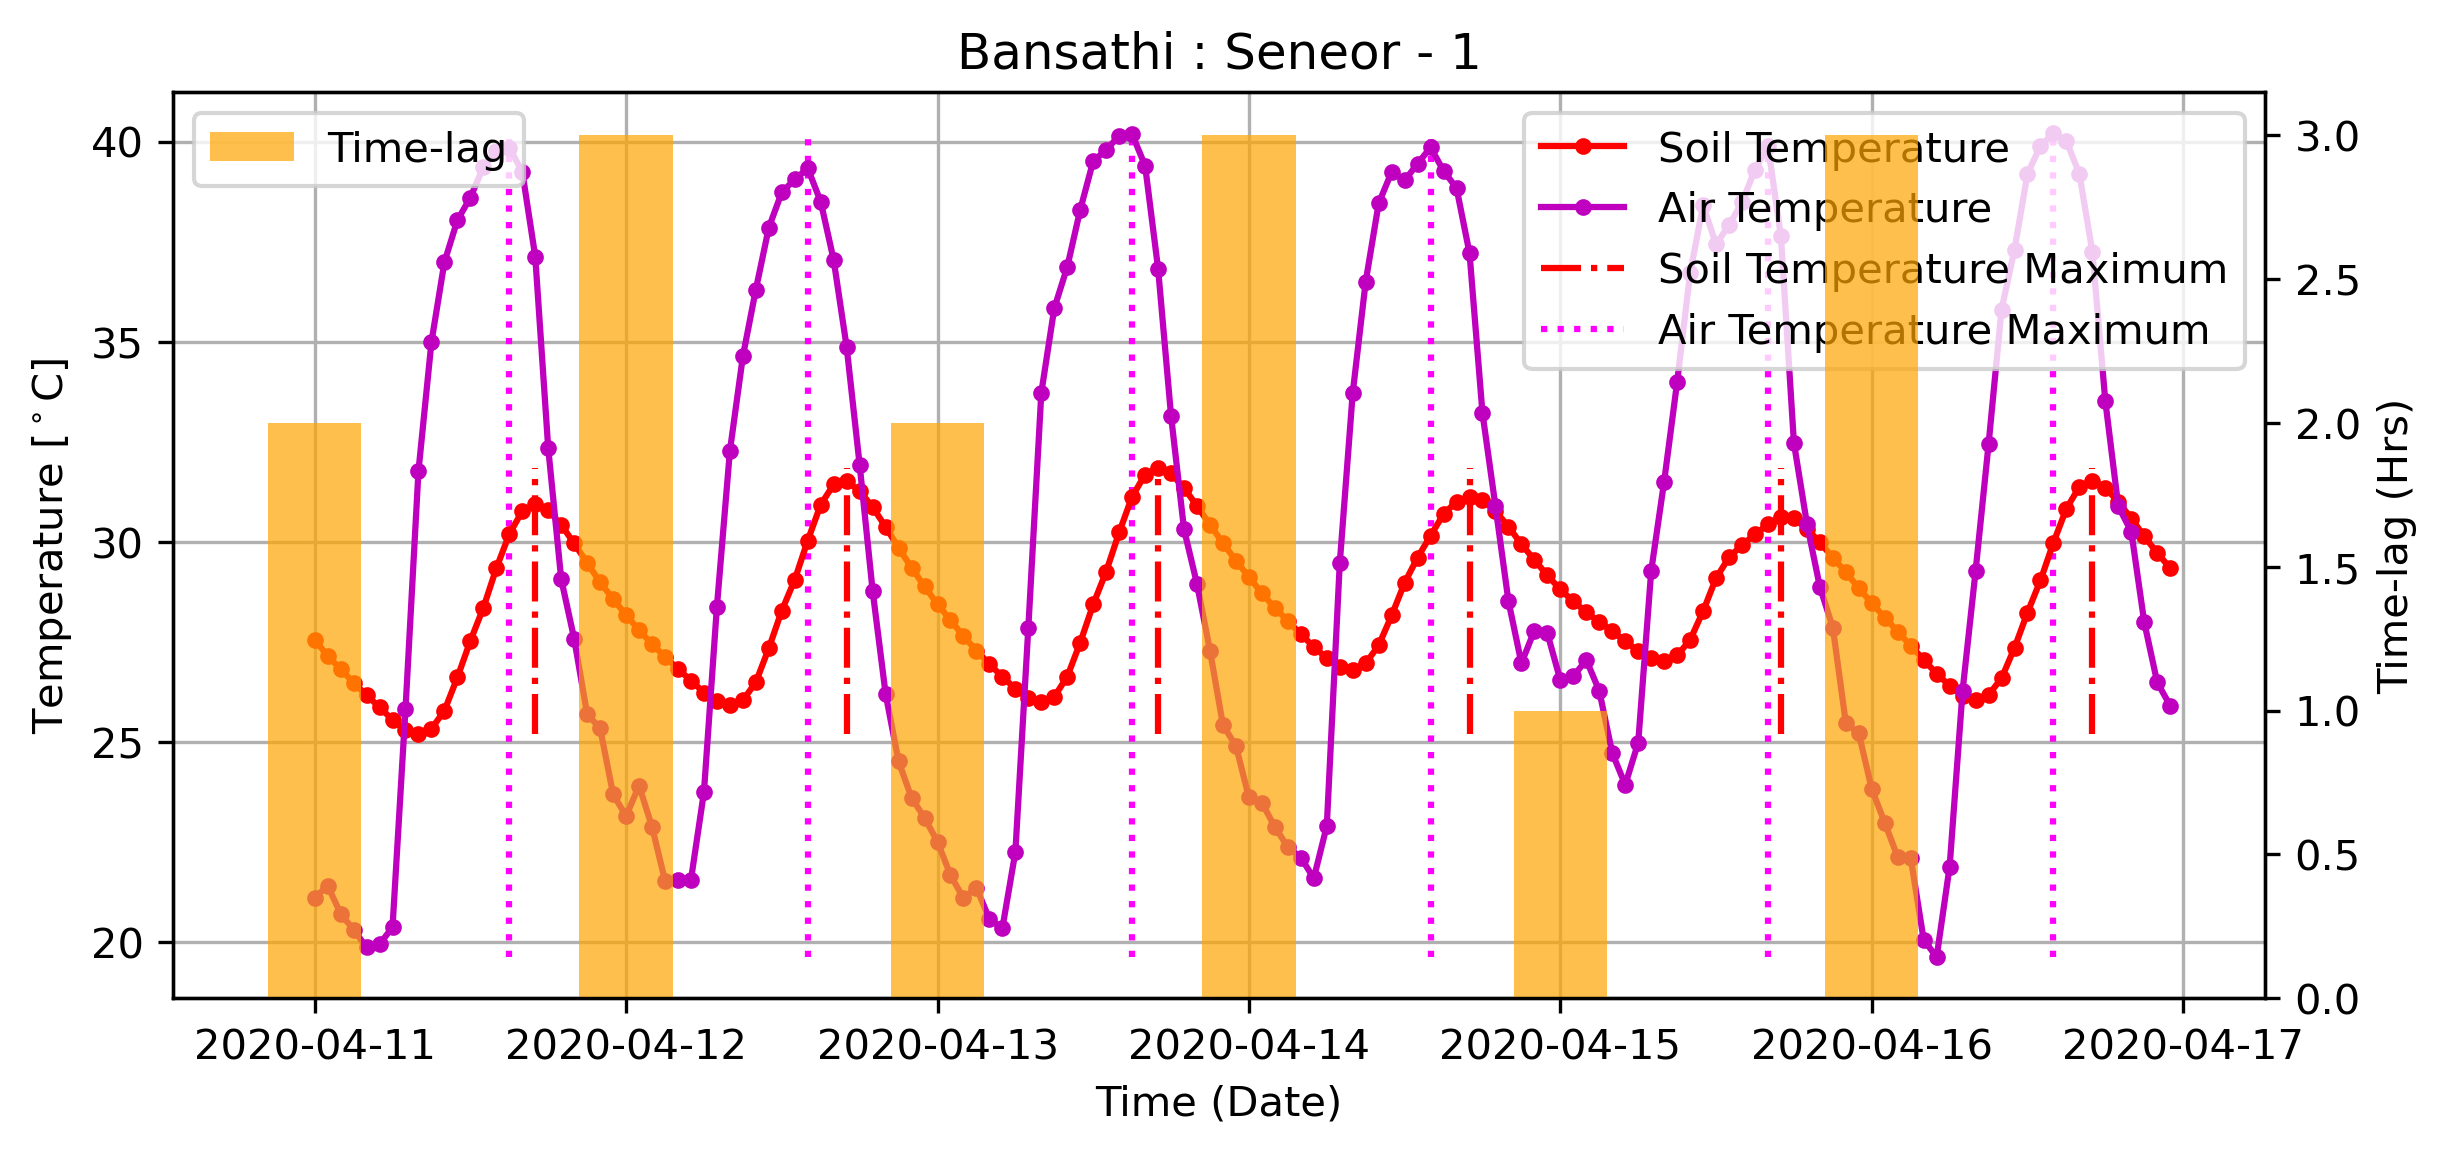

In [84]:
# S1SM_hour_1hr = bansathi_df['S1SM'].resample('60min').mean()
# max_S1SM_hour_1hr = S1SM_hour_1hr.groupby(pd.Grouper(freq='D')).idxmax()

#bansathi_df_S1SM.loc[bansathi_df_S1SM.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]]

#Note: This will require additional work, because the midnight T are 
#higher - best to subtract an exponential decay first to normalize/straighten time series (not done here yet)

# fg, ax = plt.subplots(2, 1, figsize=(20, 20), dpi=300)
# # ax0 = ax[0].twinx()
# ax[0].plot(ST_sensor1, 'r')
# ax[0].set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
# ax[0].set_xlabel('Time (Date)')
# ax[0].grid()
# bx0 = ax[1].twinx()
# ax[1].plot(Air_Temp, 'r--')
# bx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax[1].set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
# ax[1].set_xlabel('Time (Date)')
# ax[1].grid()
# plt.xticks(rotation = 35)
# ax[0].vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max())
# ax[1].vlines(max_AT_hour, Air_Temp.min(), Air_Temp.max())
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

fg, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300)
ax0 = ax.twinx()
# axx1 = axx.twinx()
ax0.bar(T_S1_lag.index, (T_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax0.set_ylabel('Time-lag (Hrs)')
ax.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# axx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax.set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
ax.set_xlabel('Time (Date)')
ax.grid()
# bxx0 = axx[1].twinx()
ax.set_title('Bansathi : Seneor - 1')
ax.plot(Air_Temp, 'm.-', label = 'Air Temperature')
# bxx0.plot(Rainfall, 'k', label = 'Rainfall')
ax.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
plt.xticks(rotation = 35)
# myFmt = DateFormatter("%H:%M:%S")
# ax0.yaxis.set_major_formatter(myFmt)
ax.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax.vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax0.legend(loc = 2)
ax.legend(loc = 1)
# plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
plt.show()

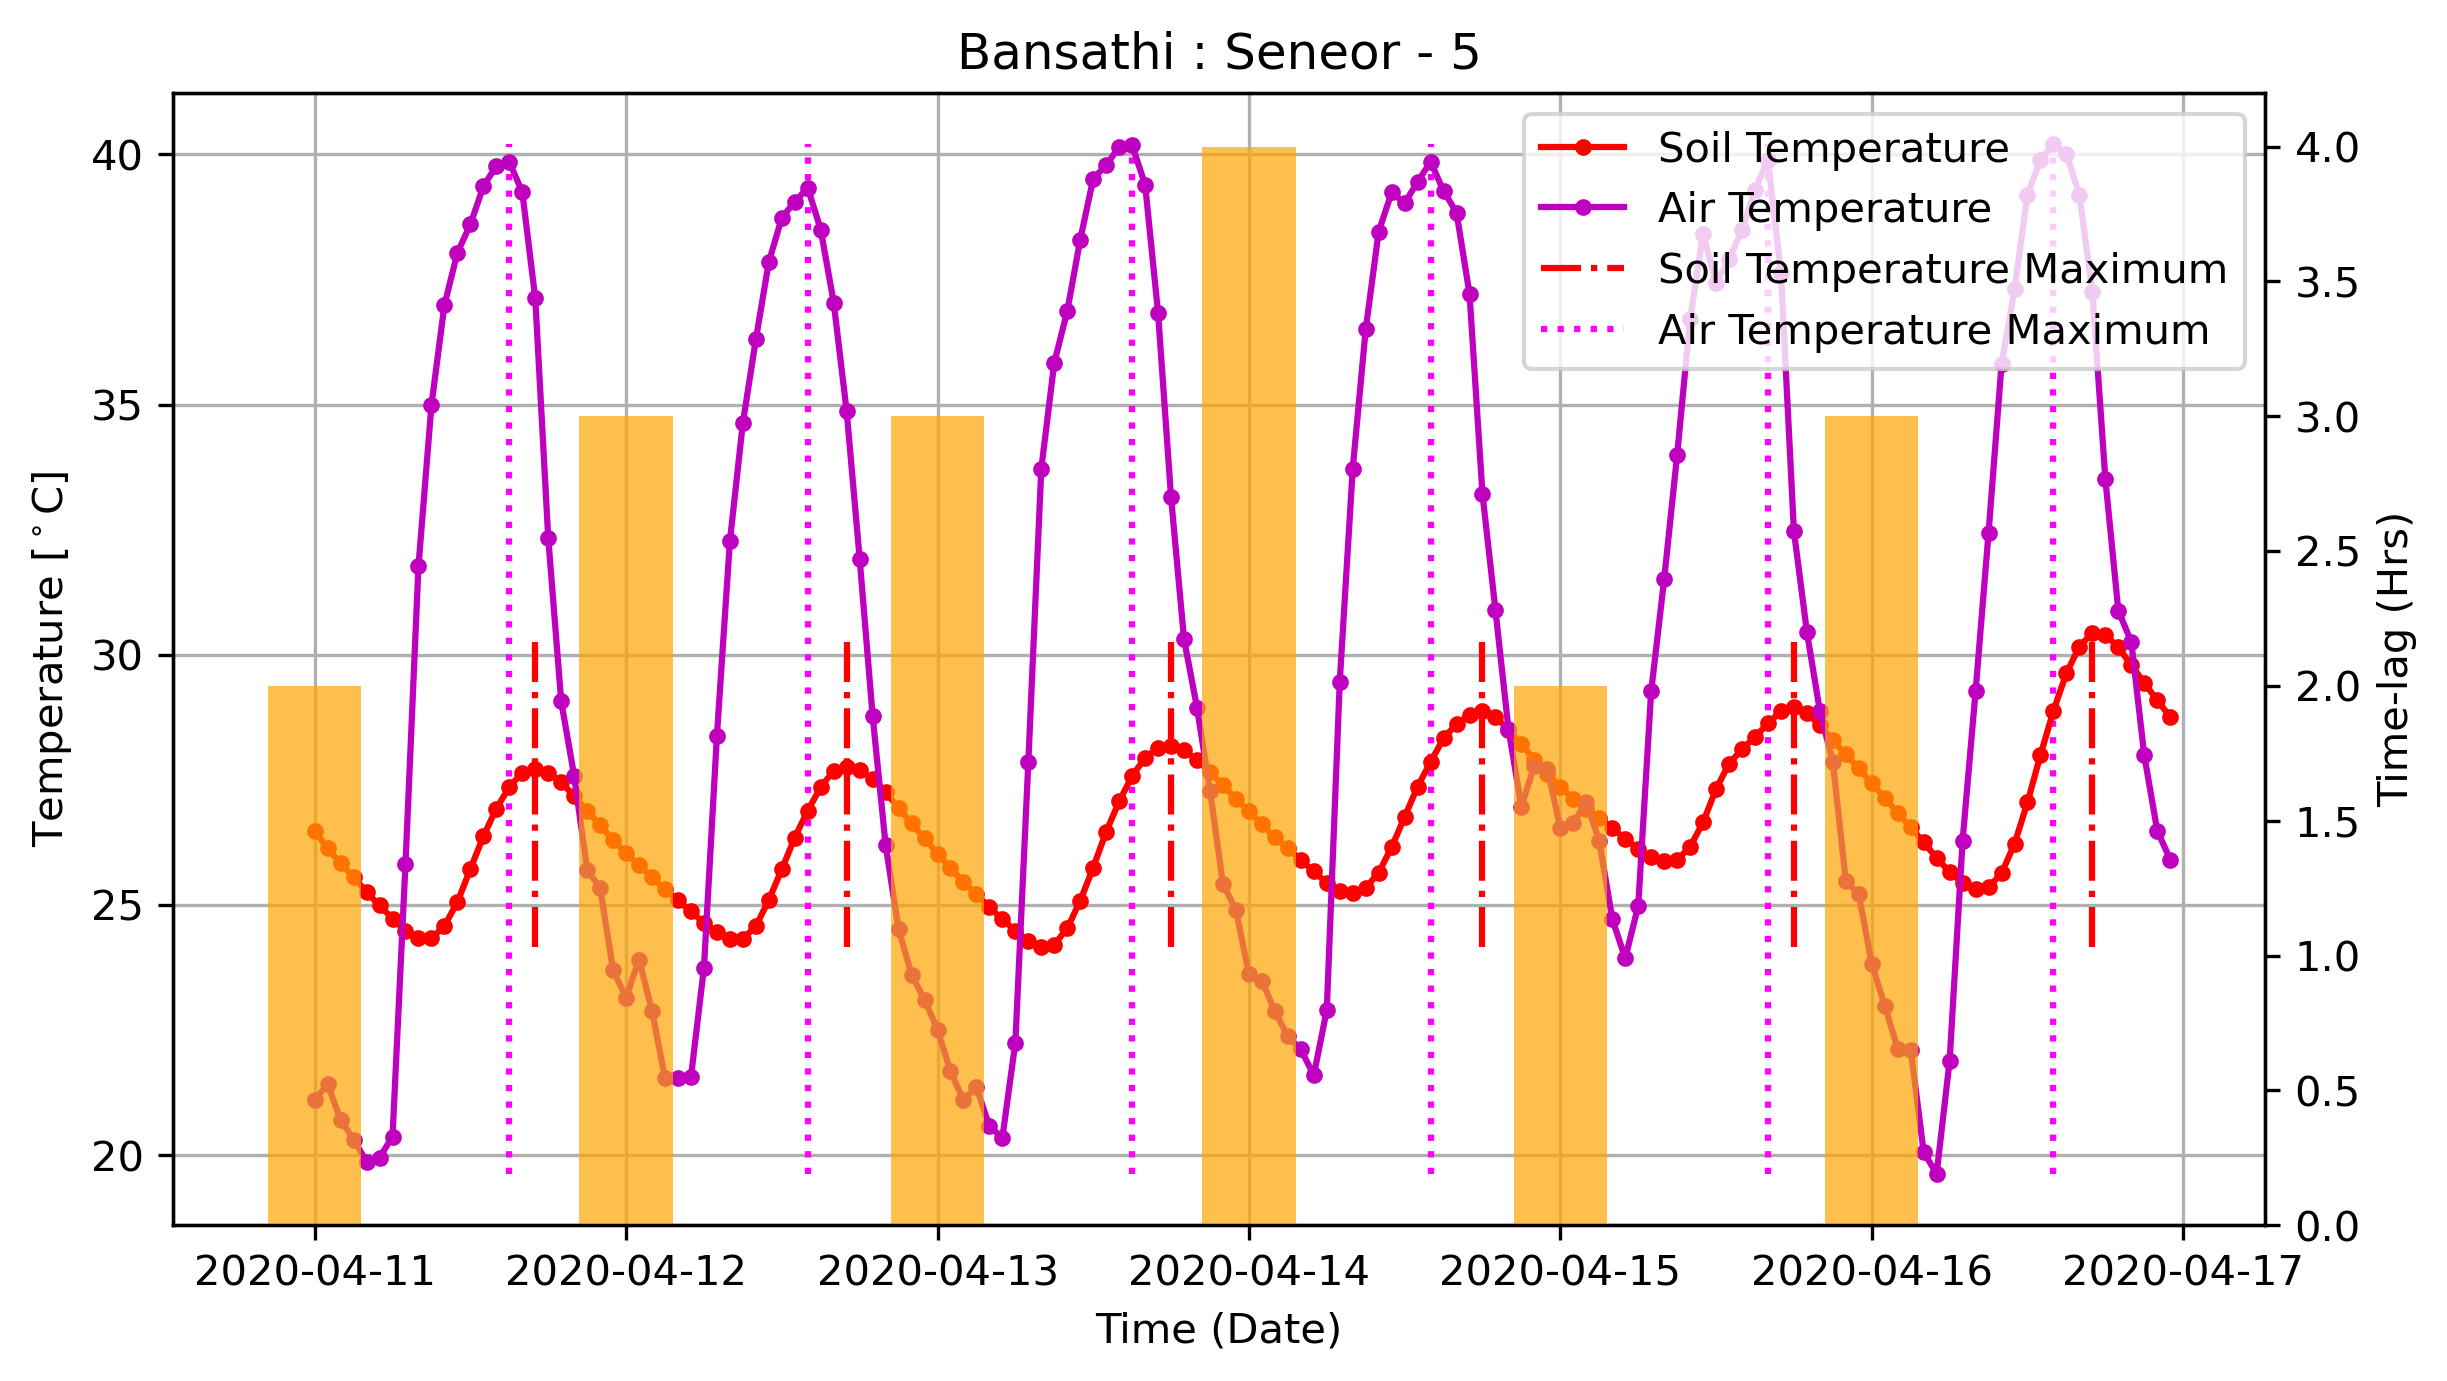

In [85]:
'''
# fg, ax1 = plt.subplots(2, 1, figsize=(20, 20), dpi=300)
# # ax0 = ax[0].twinx()
# ax1[0].plot(ST_sensor5, 'r')
# ax1[0].set_ylabel('Soil Temperature')
# ax1[0].set_xlabel('Time (Date)')
# ax1[0].grid()
# bx10 = ax[1].twinx()
# ax1[1].plot(Air_Temp, 'r--')
# bx10.plot(Rainfall, 'k', label = 'Rainfall')
# ax1[1].set_ylabel('Air Temperature')
# ax1[1].set_xlabel('Time (Date)')
# ax1[1].grid()
# plt.xticks(rotation = 35)
# ax1[0].vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max())
# ax1[1].vlines(max_AT_hour, Air_Temp.min(), Air_Temp.max())
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()
'''

fg, ax1 = plt.subplots(1, 1, figsize=(9, 5), dpi=300)
ax10 = ax1.twinx()
# axx1 = axx.twinx()
ax10.bar(T_S5_lag.index, (T_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax10.set_ylabel('Time-lag (Hrs)')
ax1.plot(ST_sensor5, 'r.-', label = 'Soil Temperature')
# axx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax1.set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
ax1.set_xlabel('Time (Date)')
ax1.set_title('Bansathi : Seneor - 5')
ax1.grid()
# bxx0 = axx[1].twinx()
ax1.plot(Air_Temp, 'm.-', label = 'Air Temperature')
# bxx0.plot(Rainfall, 'k', label = 'Rainfall')
ax1.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
plt.xticks(rotation = 35)
ax1.vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax1.vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax1.legend(loc = 0)
ax1.legend(loc = 1)
# plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
plt.show()

In [86]:
# fg, ax2 = plt.subplots(1, 1, figsize=(9, 5), dpi=300)
# ax20 = ax2.twinx()
# # axx1 = axx.twinx()
# ax20.bar(T_S6_lag.index, (T_S6_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax20.set_ylabel('Time-lag (Hrs)')
# ax2.plot(ST_sensor6, 'r.-', label = 'Soil Temperature')
# # axx0.plot(Rainfall, 'k', label = 'Rainfall')
# # ax1.set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
# ax2.set_xlabel('Time (Date)')
# ax2.set_title('Bansathi : Seneor - 6')
# ax2.grid()
# # bxx0 = axx[1].twinx()
# ax2.plot(Air_Temp, 'm.-', label = 'Air Temperature')
# # bxx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax2.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# plt.xticks(rotation = 35)
# ax2.vlines(max_S6ST_hour, ST_sensor6.min(), ST_sensor6.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax2.vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax2.legend(loc = 0)
# ax2.legend(loc = 1)
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

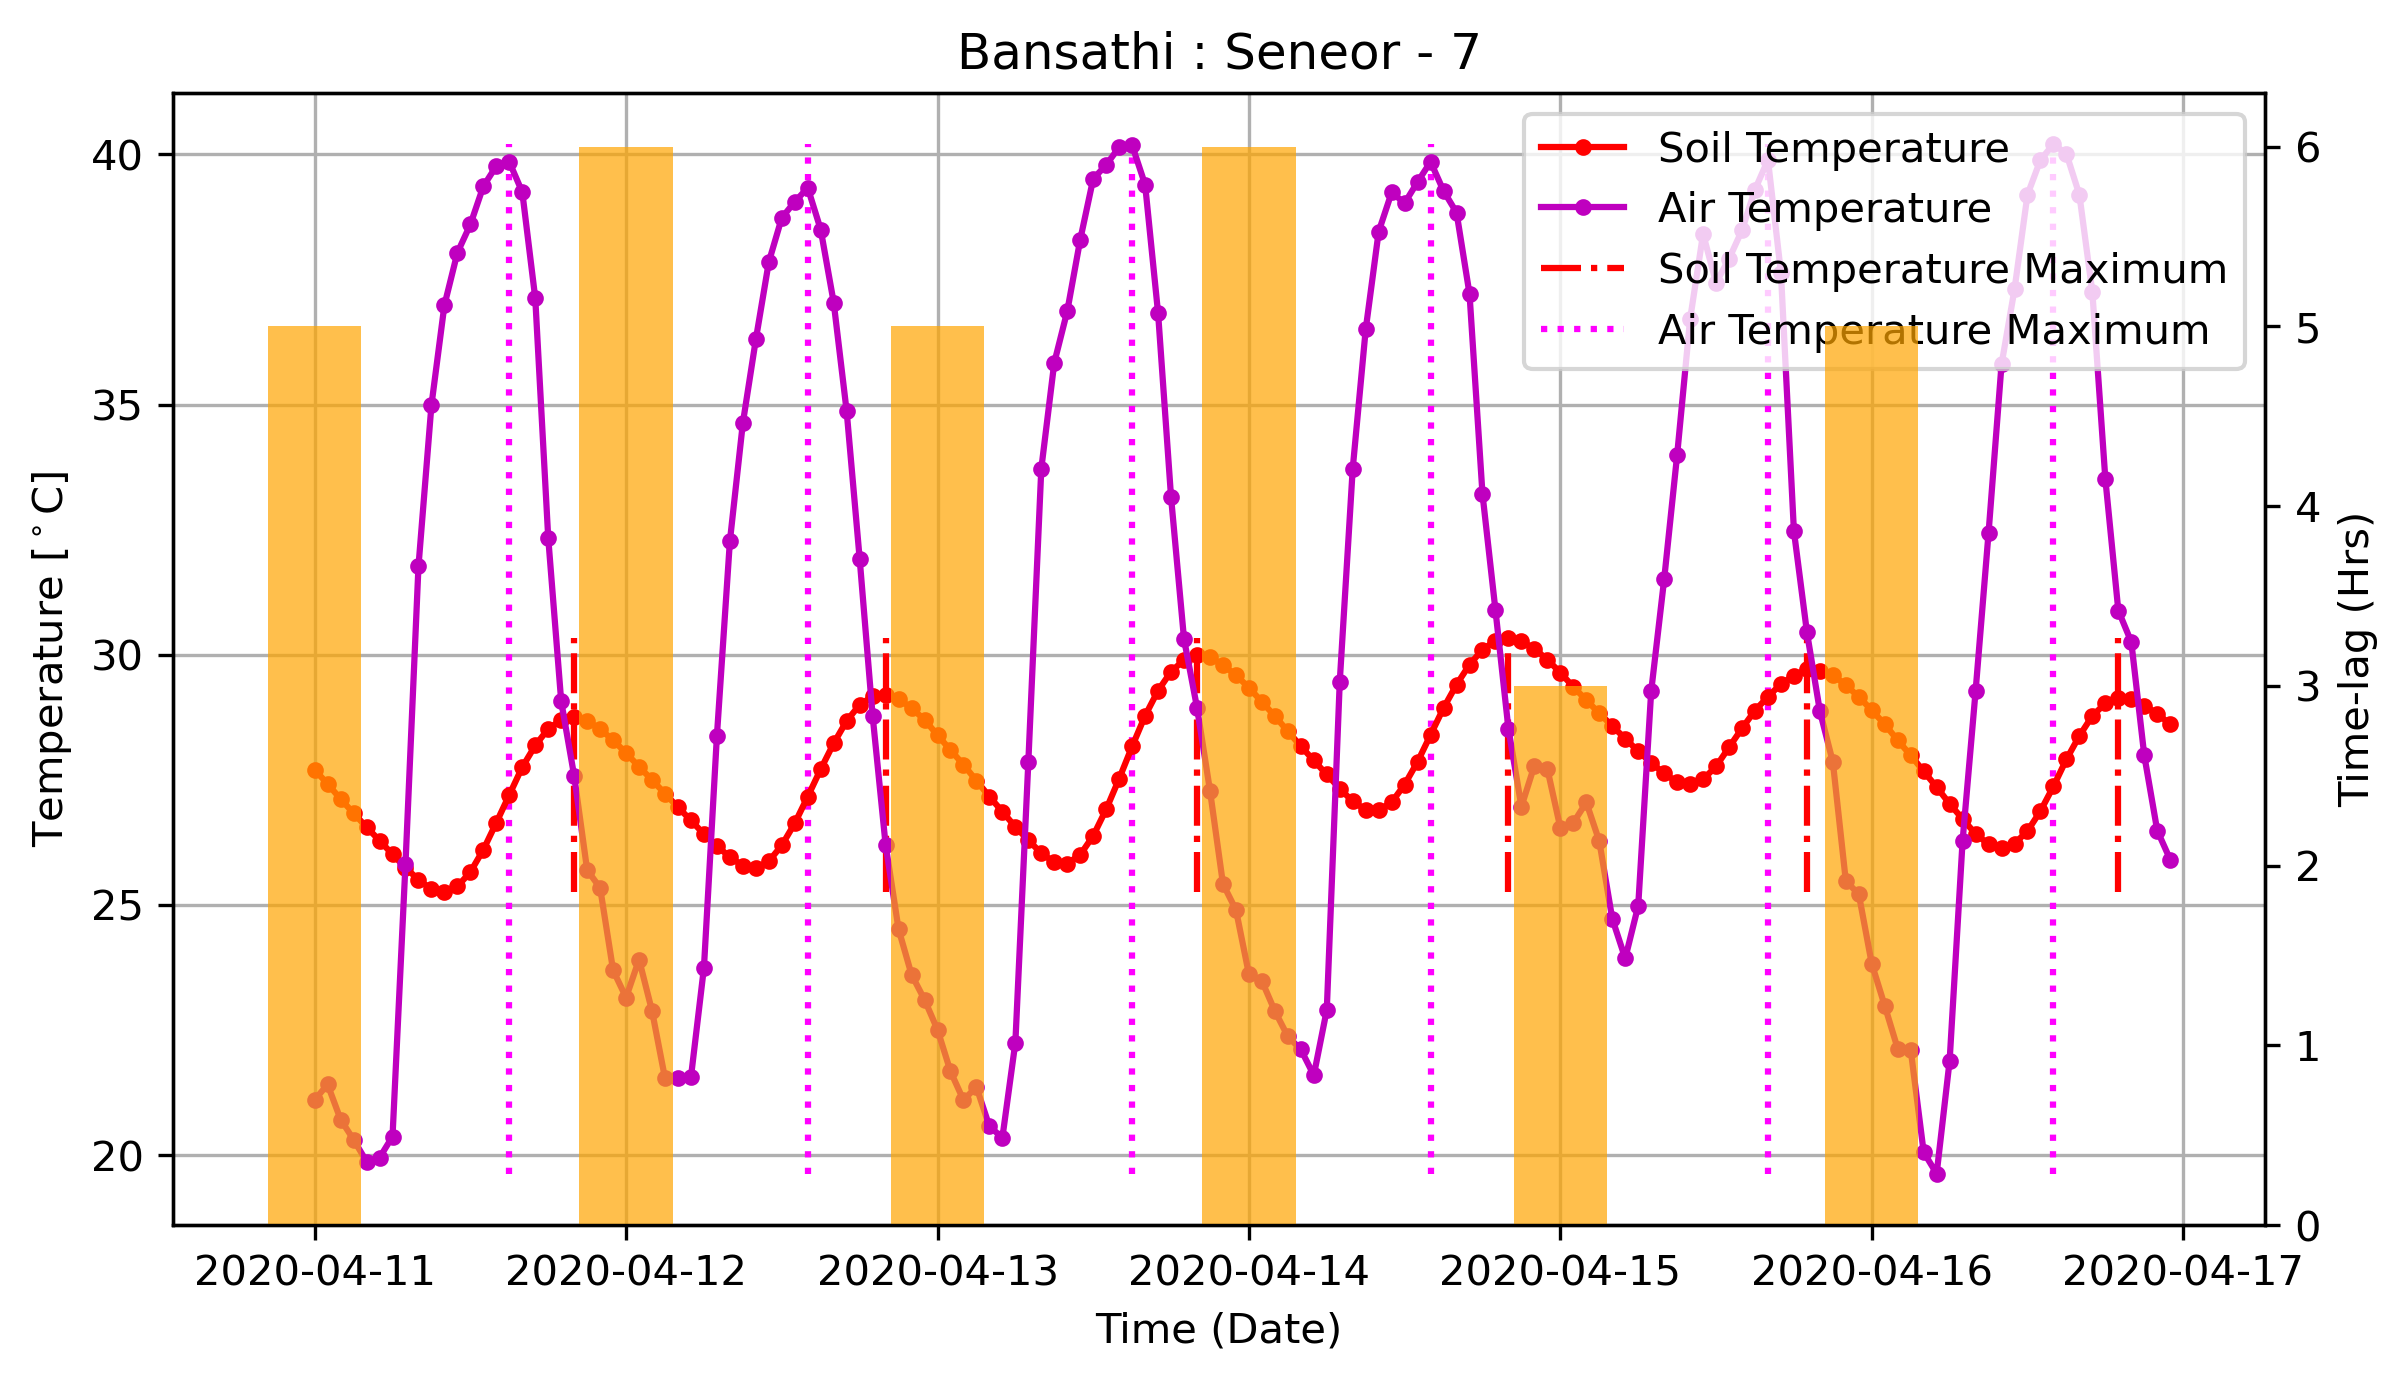

In [87]:
fg, ax3 = plt.subplots(1, 1, figsize=(9, 5), dpi=300)
ax30 = ax3.twinx()
# axx1 = axx.twinx()
ax30.bar(T_S7_lag.index, (T_S7_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax30.set_ylabel('Time-lag (Hrs)')
ax3.plot(ST_sensor7, 'r.-', label = 'Soil Temperature')
# axx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax1.set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
ax3.set_xlabel('Time (Date)')
ax3.set_title('Bansathi : Seneor - 7')
ax3.grid()
# bxx0 = axx[1].twinx()
ax3.plot(Air_Temp, 'm.-', label = 'Air Temperature')
# bxx0.plot(Rainfall, 'k', label = 'Rainfall')
ax3.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
plt.xticks(rotation = 35)
ax3.vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax3.vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax3.legend(loc = 0)
ax3.legend(loc = 1)
# plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
plt.show()

In [88]:
# fg, ax4 = plt.subplots(1, 1, figsize=(9, 5), dpi=300)
# ax40 = ax4.twinx()
# # axx1 = axx.twinx()
# ax40.bar(T_S8_lag.index, (T_S8_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax40.set_ylabel('Time-lag (Hrs)')
# ax4.plot(ST_sensor8, 'r.-', label = 'Soil Temperature')
# # axx0.plot(Rainfall, 'k', label = 'Rainfall')
# # ax1.set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
# ax4.set_xlabel('Time (Date)')
# ax4.set_title('Bansathi : Seneor - 8')
# ax4.grid()
# # bxx0 = axx[1].twinx()
# ax4.plot(Air_Temp, 'm.-', label = 'Air Temperature')
# # bxx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax4.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# plt.xticks(rotation = 35)
# ax4.vlines(max_S8ST_hour, ST_sensor8.min(), ST_sensor8.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax4.vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax4.legend(loc = 0)
# ax4.legend(loc = 1)
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

In [89]:
# fg, ax5 = plt.subplots(1, 1, figsize=(9, 5), dpi=300)
# ax50 = ax5.twinx()
# # axx1 = axx.twinx()
# ax50.bar(T_S9_lag.index, (T_S9_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax50.set_ylabel('Time-lag (Hrs)')
# ax5.plot(ST_sensor9, 'r.-', label = 'Soil Temperature')
# # axx0.plot(Rainfall, 'k', label = 'Rainfall')
# # ax1.set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
# ax5.set_xlabel('Time (Date)')
# ax5.set_title('Bansathi : Seneor - 9')
# ax5.grid()
# # bxx0 = axx[1].twinx()
# ax5.plot(Air_Temp, 'm.-', label = 'Air Temperature')
# # bxx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax5.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# plt.xticks(rotation = 35)
# ax5.vlines(max_S9ST_hour, ST_sensor9.min(), ST_sensor9.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax5.vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax5.legend(loc = 0)
# ax5.legend(loc = 1)
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

### Soil Moisture and Soil Temperature Lags

In [90]:

print("#####Soil Moisture - Temperature lag#####")
print('Sensor1 Lag:', '\n', SMT_S1_lag)
print('Sensor5 Lag:', '\n', SMT_S5_lag)
# print('Sensor6 Lag:', '\n', SMT_S6_lag)
print('Sensor7 Lag:', '\n', SMT_S7_lag)
# print('Sensor8 Lag:', '\n', SMT_S8_lag)
# print('Sensor9 Lag:', '\n', SMT_S9_lag)
print('Dates', '\n', SMT_S1_lag.index)

#####Soil Moisture - Temperature lag#####
Sensor1 Lag: 
 date
2020-04-11   0 days 09:00:00
2020-04-12   0 days 08:00:00
2020-04-13   0 days 10:00:00
2020-04-14   0 days 09:00:00
2020-04-15   0 days 09:00:00
2020-04-16   0 days 10:00:00
Freq: D, dtype: timedelta64[ns]
Sensor5 Lag: 
 date
2020-04-11   0 days 17:00:00
2020-04-12   0 days 17:00:00
2020-04-13   0 days 18:00:00
2020-04-14   0 days 18:00:00
2020-04-15   0 days 18:00:00
2020-04-16   0 days 17:00:00
Freq: D, dtype: timedelta64[ns]
Sensor7 Lag: 
 date
2020-04-11   -1 days +22:00:00
2020-04-12   -1 days +23:00:00
2020-04-13   -1 days +23:00:00
2020-04-14     0 days 00:00:00
2020-04-15   -1 days +20:00:00
2020-04-16     0 days 10:00:00
Freq: D, dtype: timedelta64[ns]
Dates 
 DatetimeIndex(['2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16'],
              dtype='datetime64[ns]', name='date', freq='D')


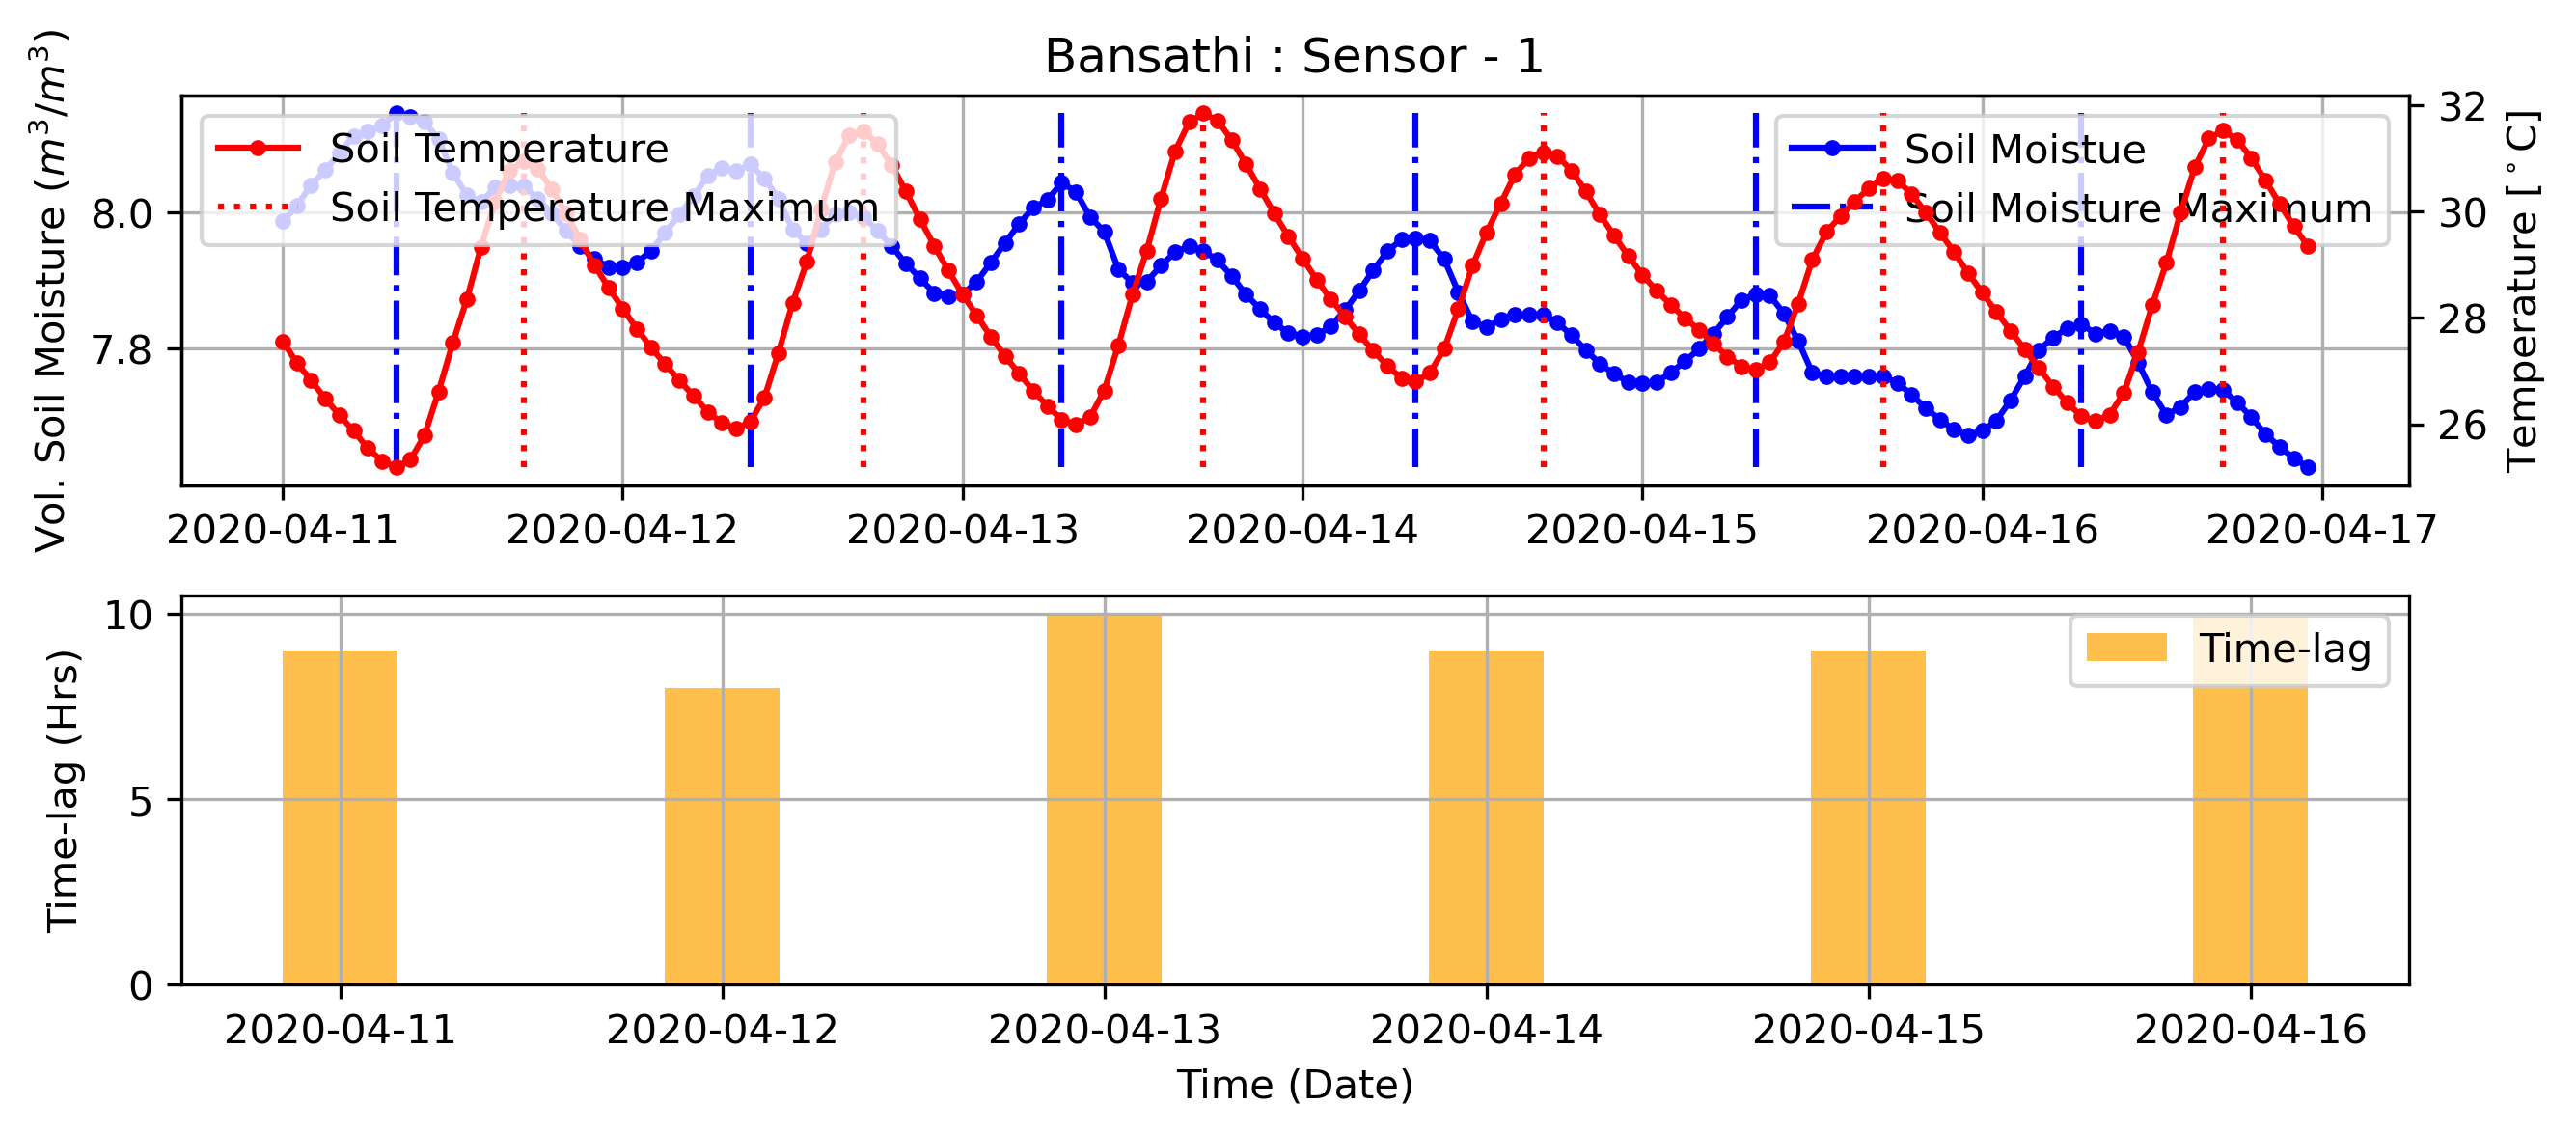

In [91]:
fg, axx = plt.subplots(2, 1, figsize=(9, 4), dpi=300, sharex = False)
axx0 = axx[0].twinx()
# axx1 = axx.twinx()
axx[0].plot(SM_sensor1, 'b.-', label = 'Soil Moistue')
axx[1].bar(SMT_S1_lag.index, (SMT_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
axx[1].set_ylabel('Time-lag (Hrs)')
# axx0.plot(Rainfall, 'k', label = 'Rainfall')
axx[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
axx[1].set_xlabel('Time (Date)')
axx[0].grid()
axx[1].grid()
axx[0].set_title('Bansathi : Sensor - 1')
# bxx0 = axx[1].twinx()
axx0.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# bxx0.plot(Rainfall, 'k', label = 'Rainfall')
axx0.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
plt.xticks(rotation = 35)
axx[0].vlines(max_S1SM_hour, SM_sensor1.min(), SM_sensor1.max(), color = 'blue', label = 'Soil Moisture Maximum',
          linestyles = 'dashdot')
axx0.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
           linestyles = 'dotted')
axx[0].legend()
axx[1].legend()
axx0.legend()
plt.tight_layout()
# plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
plt.show()

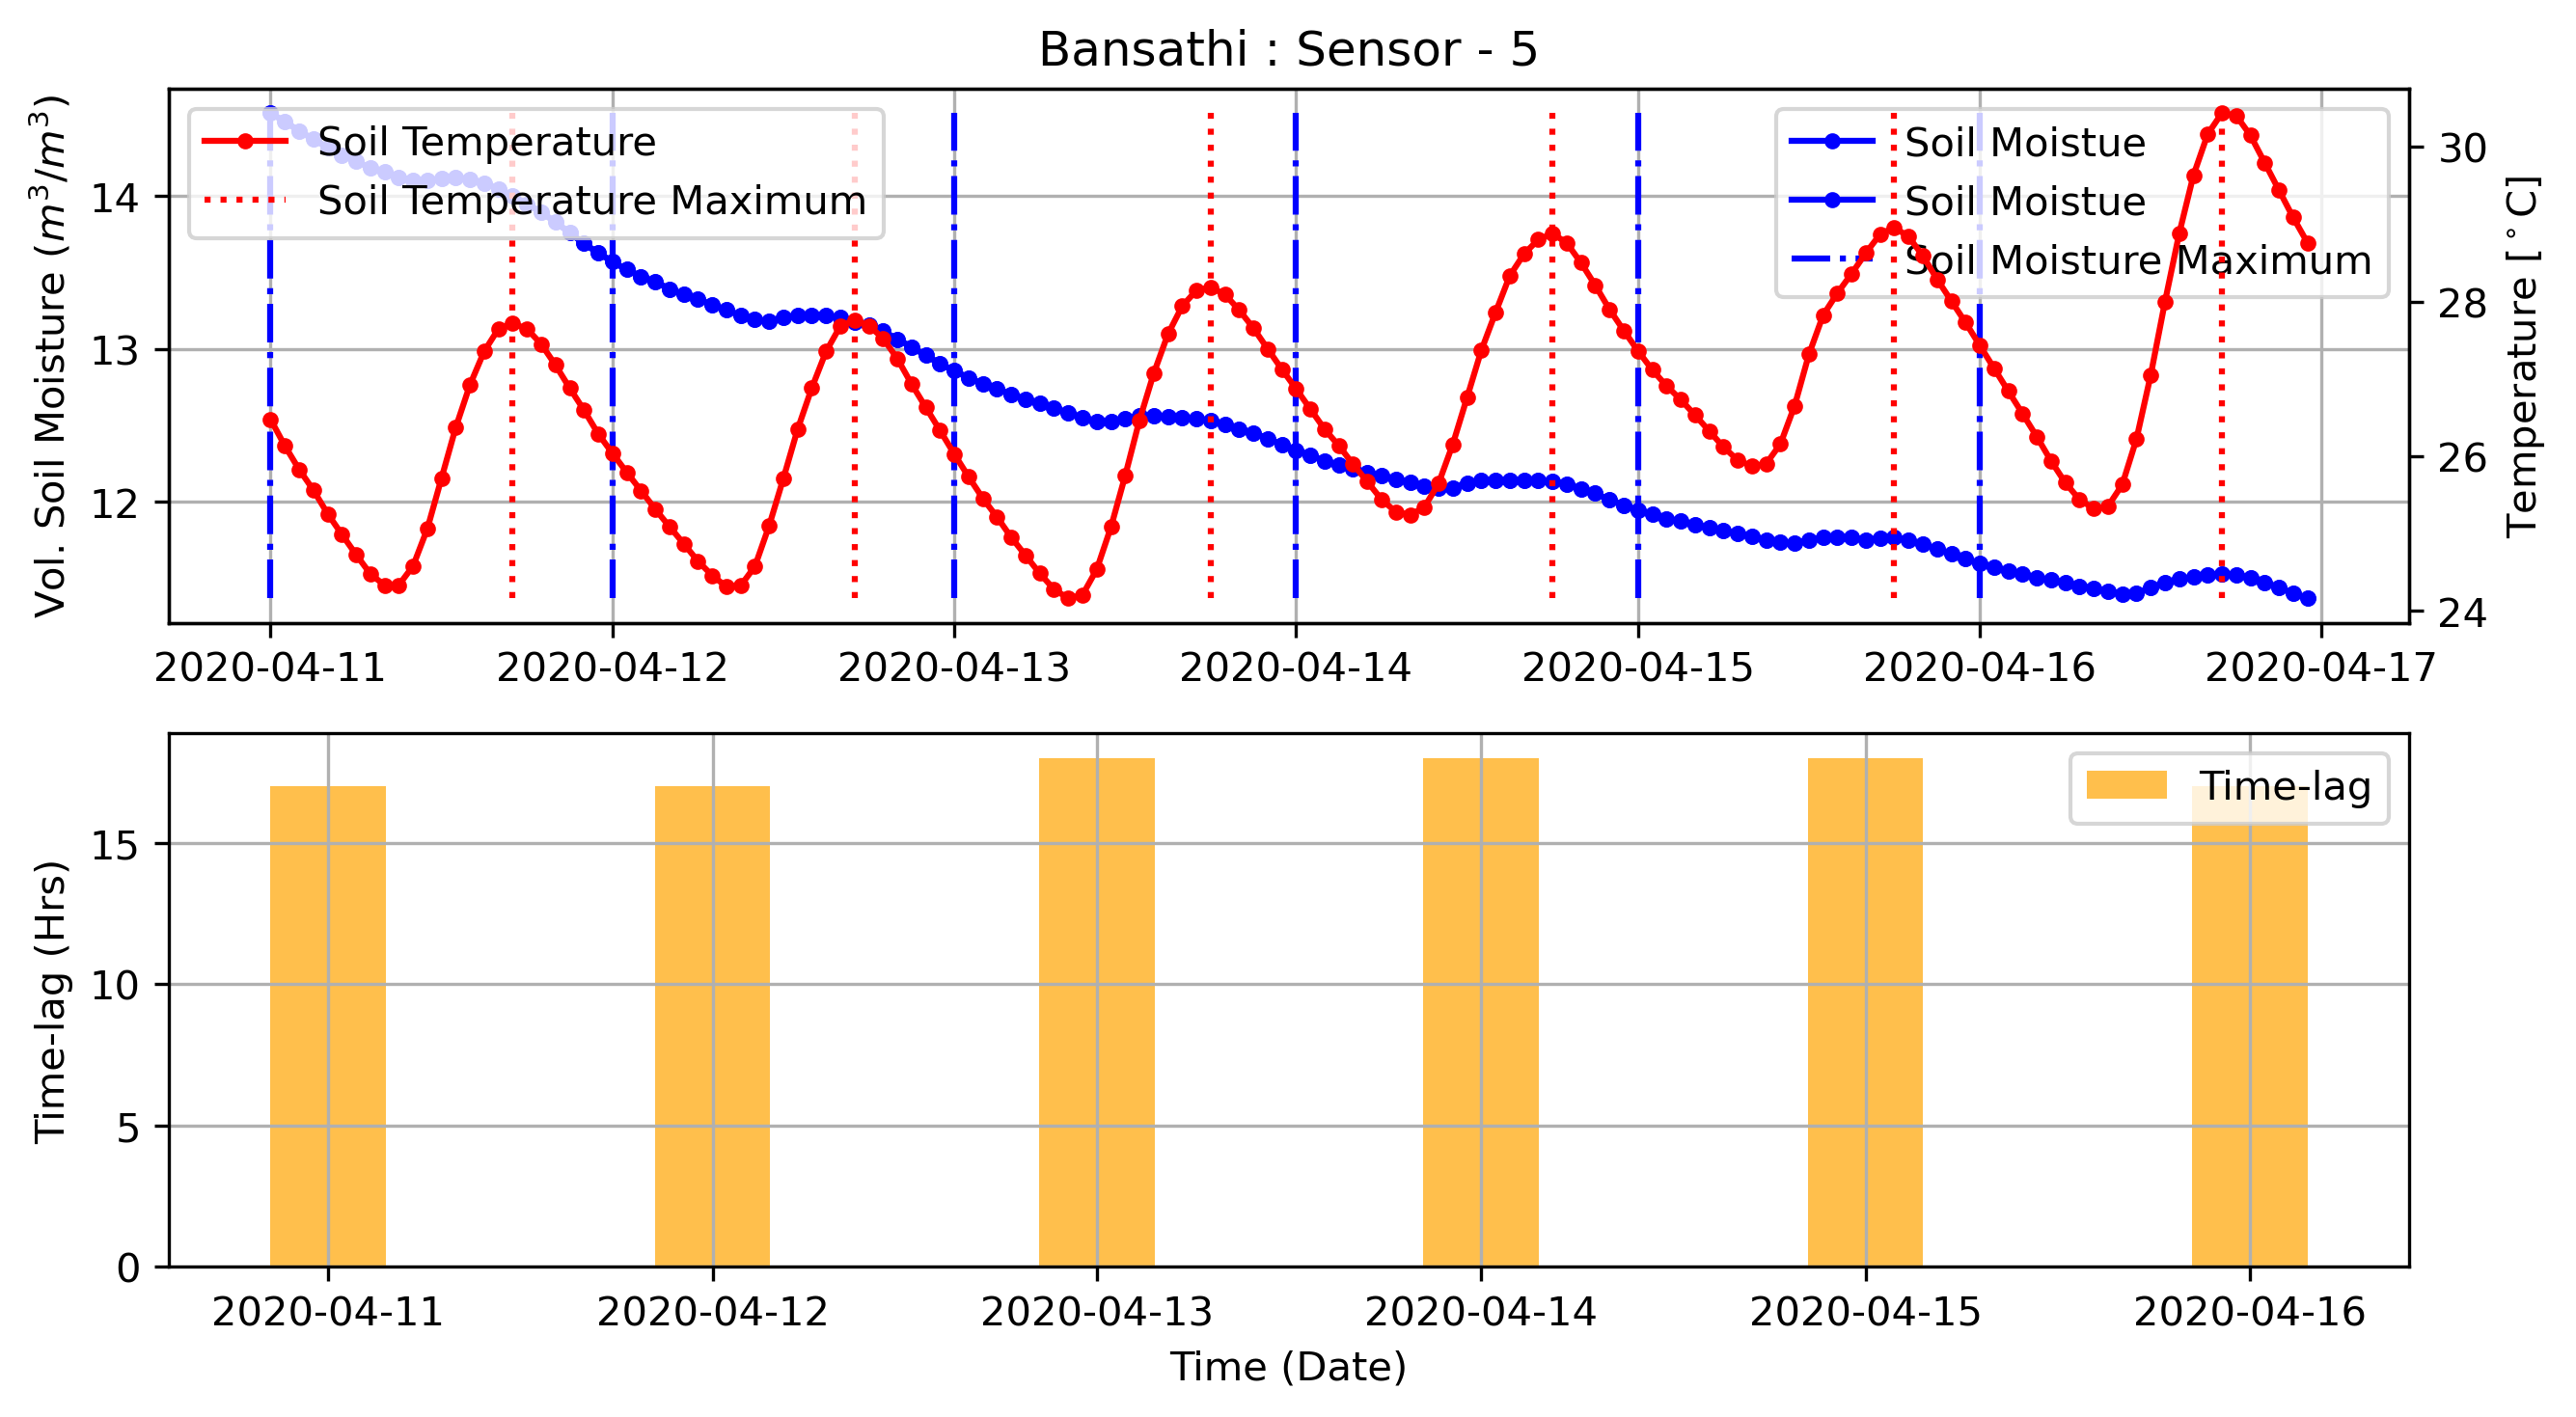

In [92]:
fg, axx1 = plt.subplots(2, 1, figsize=(9, 5), dpi=300)
axx10 = axx1[0].twinx()
# axx1 = axx.twinx()
axx1[0].plot(SM_sensor5, 'b.-', label = 'Soil Moistue')
axx1[1].bar(SMT_S5_lag.index, (SMT_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
axx1[1].set_ylabel('Time-lag (Hrs)')
axx1[0].plot(SM_sensor5, 'b.-', label = 'Soil Moistue')
# axx0.plot(Rainfall, 'k', label = 'Rainfall')
axx1[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
axx1[1].set_xlabel('Time (Date)')
axx1[0].grid()
axx1[1].grid()
axx1[0].set_title('Bansathi : Sensor - 5')
# bxx0 = axx[1].twinx()
axx10.plot(ST_sensor5, 'r.-', label = 'Soil Temperature')
# bxx0.plot(Rainfall, 'k', label = 'Rainfall')
axx10.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
plt.xticks(rotation = 35)
axx1[0].vlines(max_S5SM_hour, SM_sensor5.min(), SM_sensor5.max(), color = 'blue', label = 'Soil Moisture Maximum',
          linestyles = 'dashdot')
axx10.vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
           linestyles = 'dotted')
axx1[0].legend(loc = 1)
axx10.legend(loc = 2)
axx1[1].legend(loc = 1)
plt.tight_layout()
# plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
plt.show()

In [93]:
# fg, axx2 = plt.subplots(2, 1, figsize=(9, 5), dpi=300)
# axx20 = axx2[0].twinx()
# # axx1 = axx.twinx()
# axx2[1].bar(SMT_S6_lag.index, (SMT_S6_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx2[1].set_ylabel('Time-lag (Hrs)')
# axx2[0].plot(SM_sensor6, 'b.-', label = 'Soil Moistue')
# # axx0.plot(Rainfall, 'k', label = 'Rainfall')
# axx2[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
# axx2[1].set_xlabel('Time (Date)')
# axx2[0].grid()
# axx2[1].grid()
# axx2[0].set_title('Bansathi : Sensor - 6')
# # bxx0 = axx[1].twinx()
# axx20.plot(ST_sensor6, 'r.-', label = 'Soil Temperature')
# # bxx0.plot(Rainfall, 'k', label = 'Rainfall')
# axx20.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# plt.xticks(rotation = 35)
# axx2[0].vlines(max_S6SM_hour, SM_sensor6.min(), SM_sensor6.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx20.vlines(max_S6ST_hour, ST_sensor6.min(), ST_sensor6.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx2[0].legend(loc = 0)
# axx2[1].legend(loc = 0)
# axx20.legend(loc = 1)
# plt.tight_layout()
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

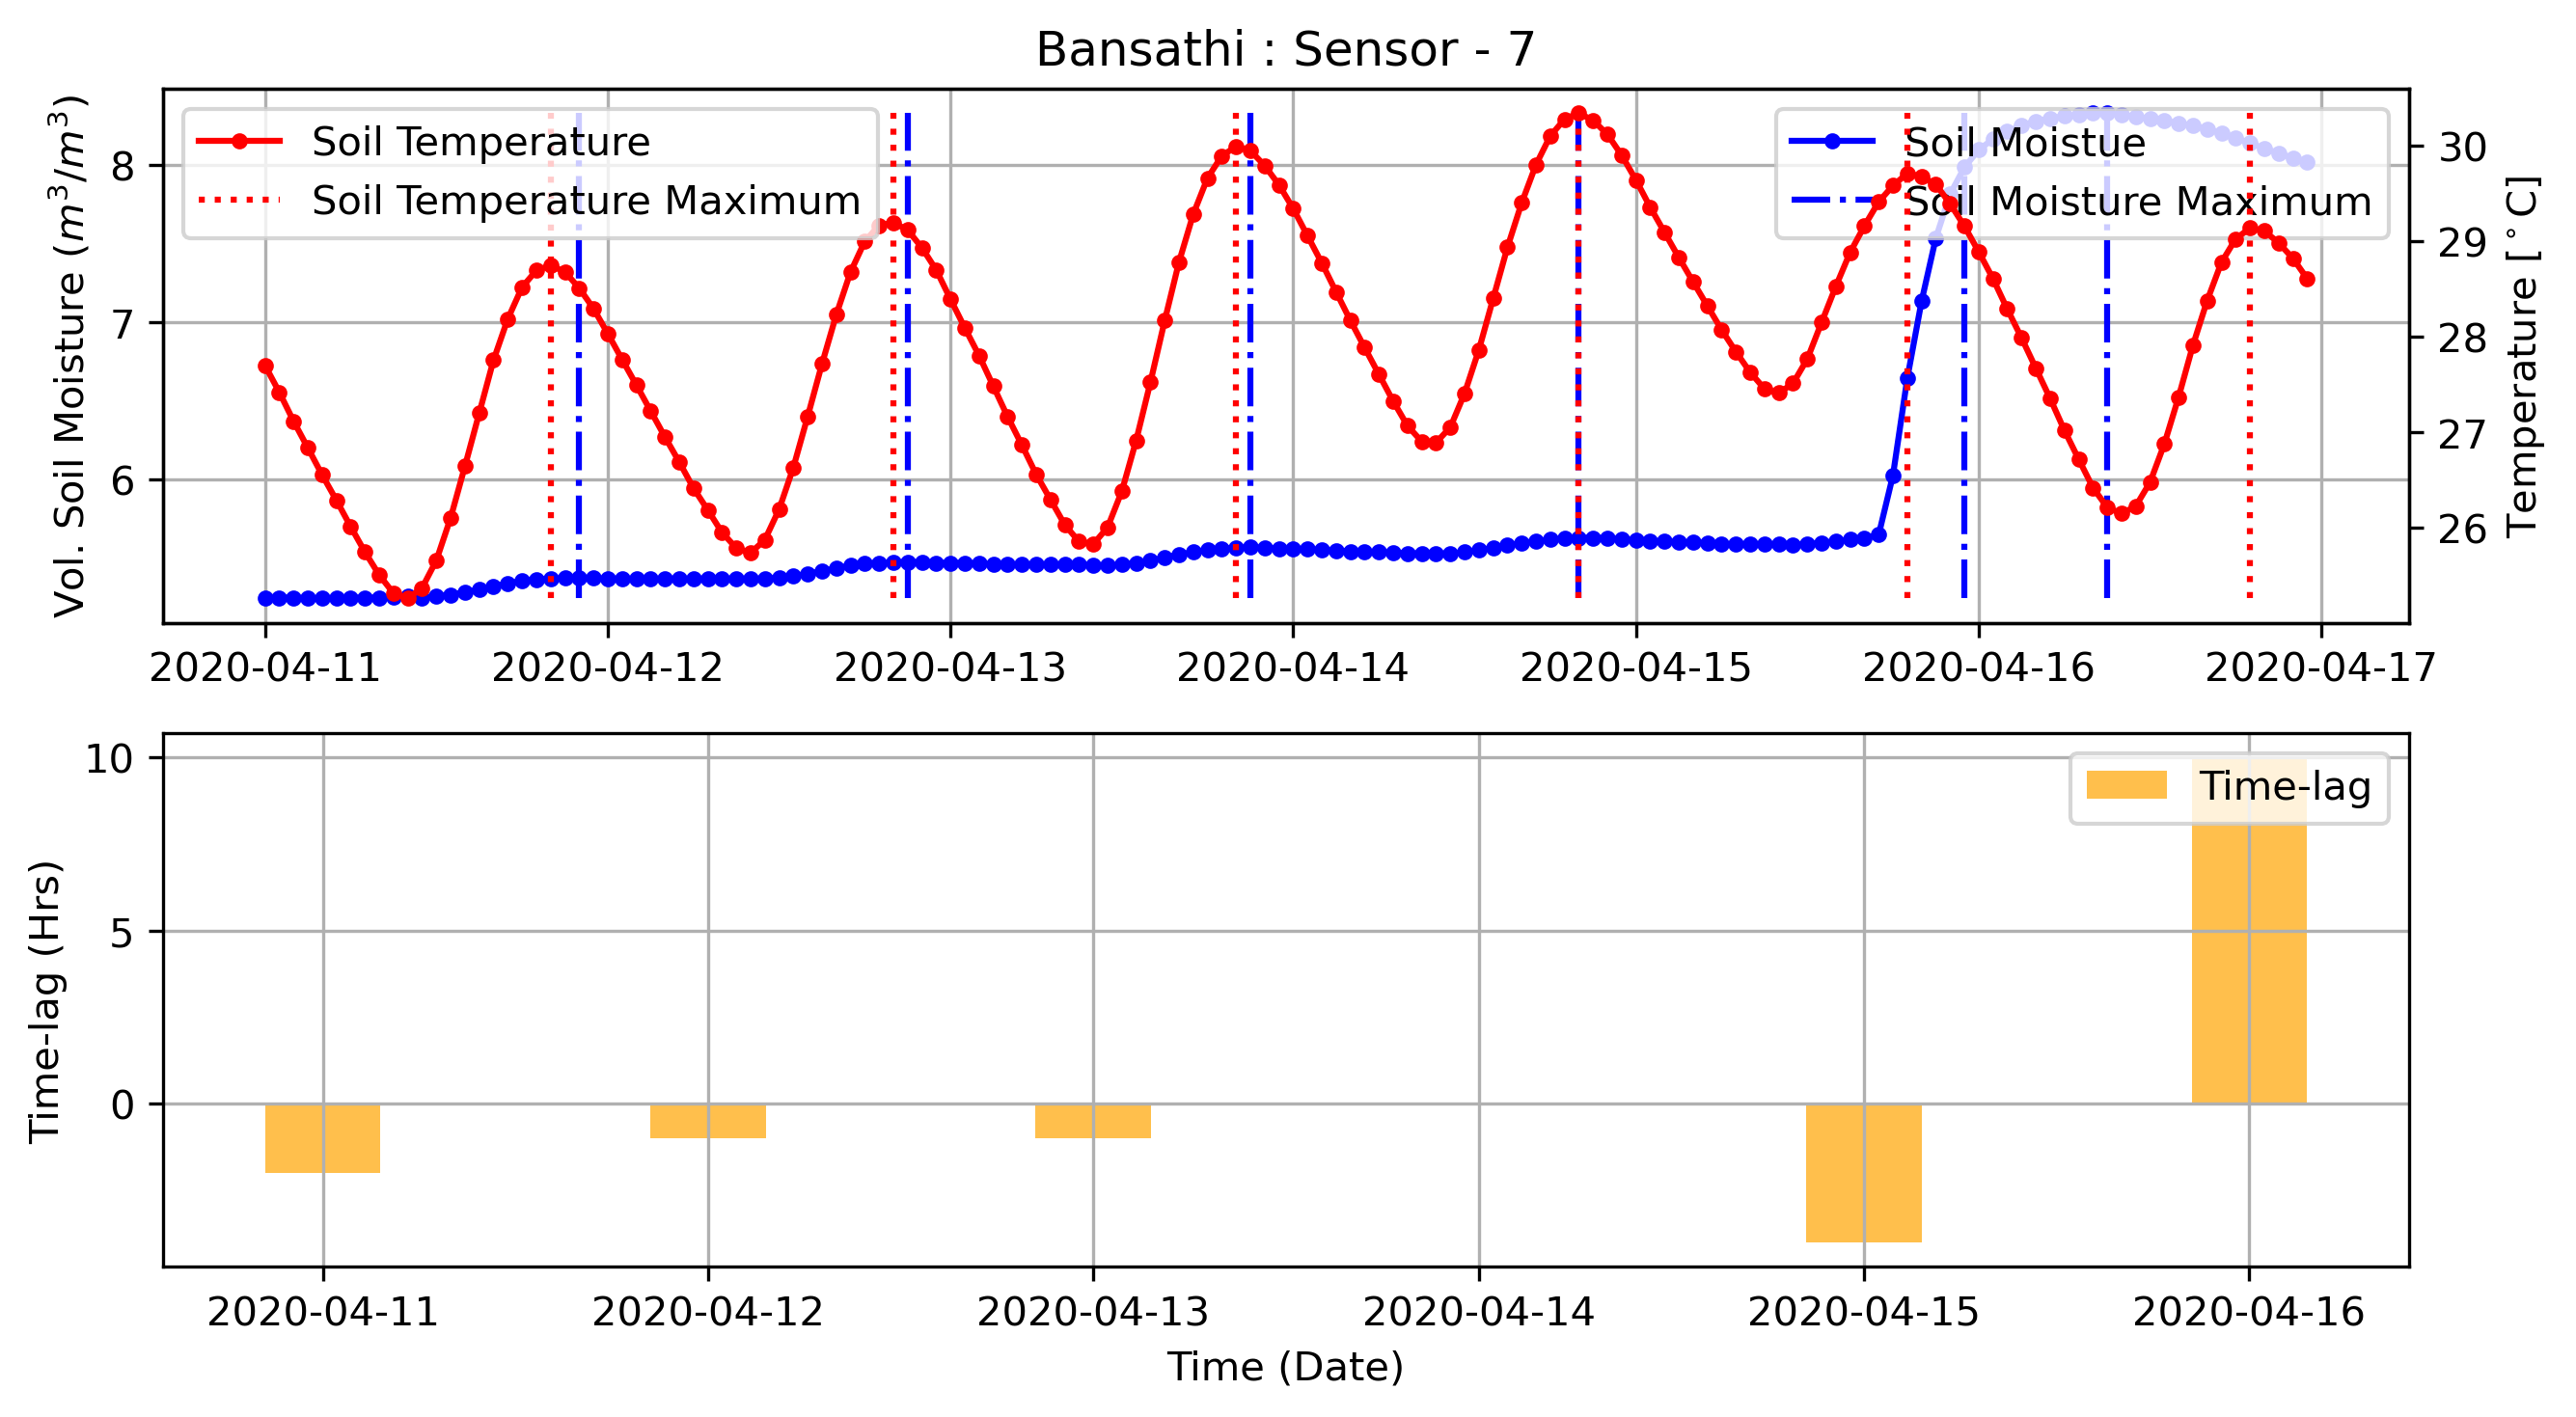

In [94]:
fg, axx3 = plt.subplots(2, 1, figsize=(9, 5), dpi=300)
axx30 = axx3[0].twinx()
# axx1 = axx.twinx()
axx3[0].plot(SM_sensor7, 'b.-', label = 'Soil Moistue')
axx3[1].bar(SMT_S7_lag.index, (SMT_S7_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
axx3[1].set_ylabel('Time-lag (Hrs)')
# axx0.plot(Rainfall, 'k', label = 'Rainfall')
axx3[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
axx3[1].set_xlabel('Time (Date)')
axx3[0].grid()
axx3[1].grid()
axx3[0].set_title('Bansathi : Sensor - 7')
# bxx0 = axx[1].twinx()
axx30.plot(ST_sensor7, 'r.-', label = 'Soil Temperature')
# bxx0.plot(Rainfall, 'k', label = 'Rainfall')
axx30.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
plt.xticks(rotation = 35)
axx3[0].vlines(max_S7SM_hour, SM_sensor7.min(), SM_sensor7.max(), color = 'blue', label = 'Soil Moisture Maximum',
          linestyles = 'dashdot')
axx30.vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
           linestyles = 'dotted')
axx3[0].legend(loc = 1)
axx30.legend(loc = 2)
axx3[1].legend(loc = 1)
plt.tight_layout()
# plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
plt.show()

In [95]:
# fg, axx4 = plt.subplots(2, 1, figsize=(9, 5), dpi=300)
# axx40 = axx4[0].twinx()
# # axx1 = axx.twinx()
# axx4[0].plot(SM_sensor8, 'b.-', label = 'Soil Moistue')
# axx4[1].bar(SMT_S8_lag.index, (SMT_S8_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx4[1].set_ylabel('Time-lag (Hrs)')
# axx4[0].plot(SM_sensor8, 'b.-', label = 'Soil Moistue')
# # axx0.plot(Rainfall, 'k', label = 'Rainfall')
# axx4[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
# axx4[1].set_xlabel('Time (Date)')
# axx4[0].grid()
# axx4[1].grid()
# axx4[0].set_title('Bansathi : Sensor - 8')
# # bxx0 = axx[1].twinx()
# axx40.plot(ST_sensor8, 'r.-', label = 'Soil Temperature')
# # bxx0.plot(Rainfall, 'k', label = 'Rainfall')
# axx40.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# plt.xticks(rotation = 35)
# axx4[0].vlines(max_S8SM_hour, SM_sensor8.min(), SM_sensor8.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx40.vlines(max_S8ST_hour, ST_sensor8.min(), ST_sensor8.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx4[0].legend(loc = 1)
# axx40.legend(loc = 2)
# axx4[1].legend(loc = 1)
# plt.tight_layout()
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

In [96]:
# fg, axx5 = plt.subplots(2, 1, figsize=(9, 5), dpi=300)
# axx50 = axx5[0].twinx()
# # axx1 = axx.twinx()
# axx5[0].plot(SM_sensor9, 'b.-', label = 'Soil Moistue')
# axx5[1].bar(SMT_S9_lag.index, (SMT_S9_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx5[1].set_ylabel('Time-lag (Hrs)')
# # axx0.plot(Rainfall, 'k', label = 'Rainfall')
# axx5[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
# axx5[1].set_xlabel('Time (Date)')
# axx5[0].grid()
# axx5[1].grid()
# axx5[0].set_title('Bansathi : Sensor - 9')
# # bxx0 = axx[1].twinx()
# axx50.plot(ST_sensor8, 'r.-', label = 'Soil Temperature')
# # bxx0.plot(Rainfall, 'k', label = 'Rainfall')
# axx50.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# plt.xticks(rotation = 35)
# axx5[0].vlines(max_S9SM_hour, SM_sensor9.min(), SM_sensor9.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx50.vlines(max_S9ST_hour, ST_sensor9.min(), ST_sensor9.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx5[0].legend(loc = 1)
# axx50.legend(loc = 2)
# axx5[1].legend(loc = 1)
# plt.tight_layout()
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

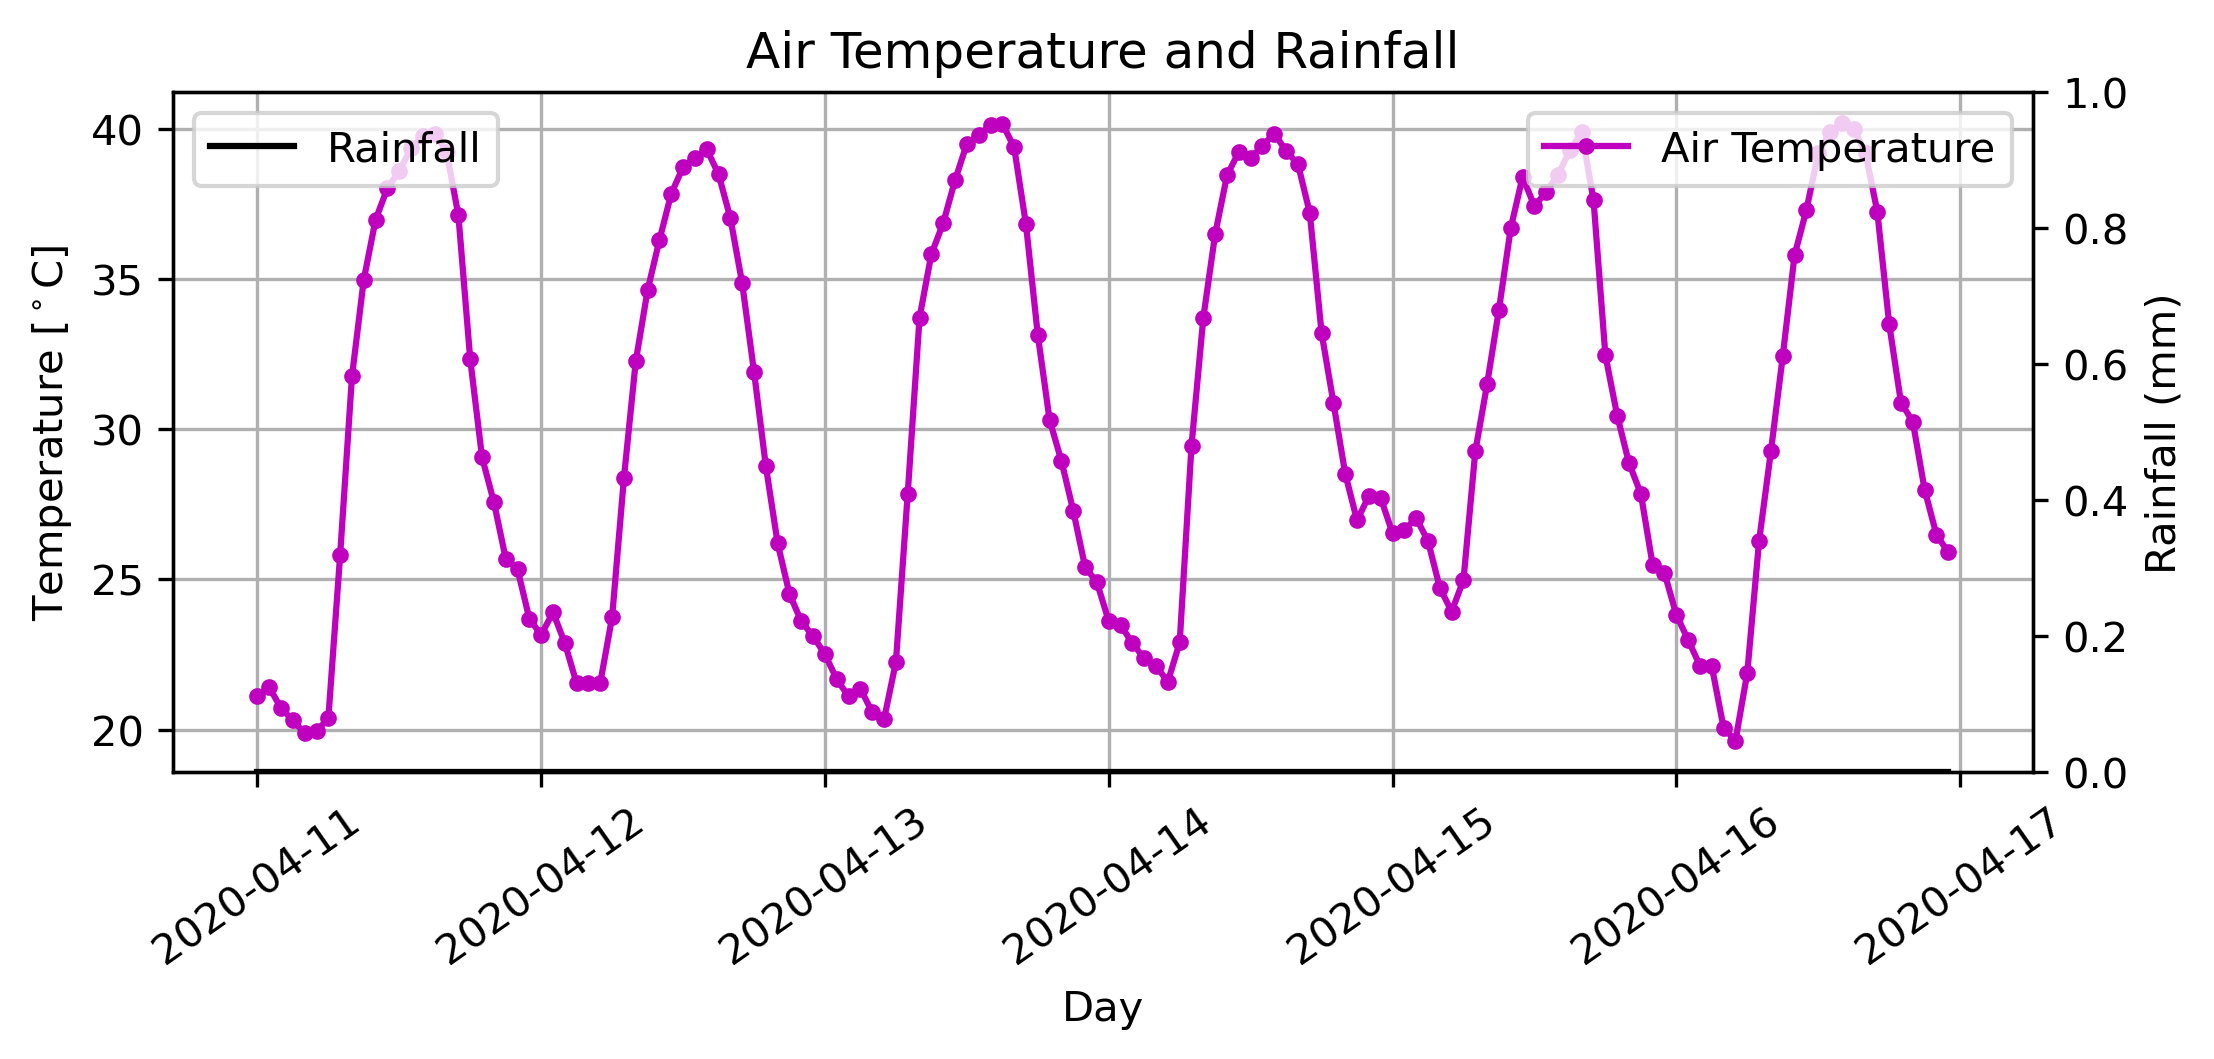

In [97]:
fig, dx = plt.subplots(1,1, figsize = (8, 3), dpi = 300)
dax = dx.twinx()
dx.plot(Air_Temp, 'm.-', label = 'Air Temperature')
dx.set_title('Air Temperature and Rainfall')
dax.plot(Rainfall.index, Rainfall.values, 'k', label = 'Rainfall')
dax.set_ylim((0, 1))
dx.grid()
dx.set_xlabel('Day')
dx.set_ylabel('Temperature [$^\circ$C]')
dax.set_ylabel('Rainfall (mm)')
dx.tick_params(axis = 'x',rotation=35)
dx.legend(loc=1)
dax.legend(loc=2);